<a href="https://colab.research.google.com/github/jwphantom/tree-growth-simulator/blob/main/TP_Proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
import math

1 - 

a) Ecriture du simulateur d'un similuteur de la loi bruit

b) Code du calcul de la densité

c) Code du des probabilités

d) Code du calcul des quantiles

In [54]:
#supposons le paramètre thêta = 1 
t = 0.05

In [55]:
#initialisation du seed à 13
seed = 13

In [56]:
# a) Simulateur de la loi du bruit
def invForest(x):
    r = []
    for i in x:
        if(i<0):
            return r.append(0)
        elif(i>0 and i<1):
            Result=(-1/t)*math.log(1-i)
            r.append(Result)
    return r

In [57]:
# b) fonction de densité
def dForest(x):
    p=t*x
    if(x<0):
        return 0
    return t*math.exp(-p)

In [58]:
# c) fonction de probabilité
def pForest(q):
    return frForest(q)

In [59]:
# d) fonction des quantiles
def qForest(p):
    return(invForest(p))

In [60]:
# Fonction de répartition.
def frForest(x):
    print(x)
    p=x*t
    if(x<0):
        return 0
    result= 1-math.exp(-p)
    return result

2- Test des fonctions , répresenation des histogrammes d'un jeu tiré de vos simulations


In [61]:
# a) Generateur des variables alatoire
def randomForest(n):
    
    u= np.random.uniform(size=n)
    return (invForest(u))

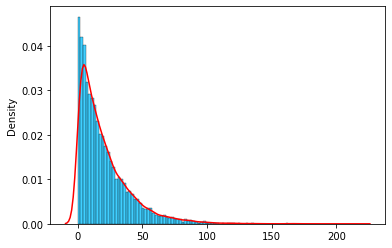

In [62]:
# b) Tracer de l'histogramme 

g = randomForest(10000)

sns.histplot(g, color='deepskyblue', stat='density')
sns.kdeplot(g, color='red')
plt.show()

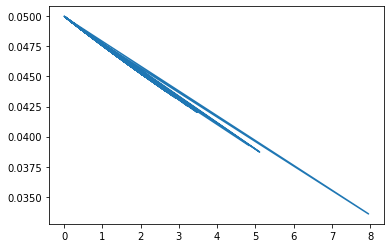

In [63]:
# c) Test de la fonction de densité


#Fonction qui injecte n valeur dans la fonction de densité
def injectValue(x):
    r = []
    for i in x:
        r.append(dForest(i))
    return r

#récuparation dans un tableau pour traçer la fonction du bruit.

def plotBruit(n):
  x = np.random.exponential(size=n)
  y = injectValue(x)

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotBruit(100)


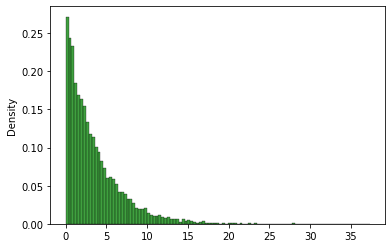

In [64]:
# c) Tracé de la loi exponentielle 

# Using exponential() method
s= np.random.seed(seed)


gfg = np.random.exponential(3.45, 10000)

sns.histplot(gfg, color='green', stat='density')
plt.show()

3- 

a) Ecrivons le code du modèle

In [65]:
t = 0.001
from scipy.stats import multivariate_normal


# Fonction du modèle
def model():
  D = 150
  r = 0.3
  s= np.random.seed(seed)

  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-1])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   



b)  Affichons les valeurs en cm de la taille de l'arbre

In [66]:
print(model()) 

[10.224326730071578, 12.287272573038988, 35110.8714005109, 8761066.664645605, 652309422.9115466, 442744968.62576556, 3302185534.2007775, 2488744442.230461, 65119557619.37589, 175355756505.16727, 891686551495.7113, 773326267937.8691, 1003729317957.0835, 26964286700.106472, 86775760674.9257, 1384396175277.325, 889204131131.7026, 1002859215297.1178, 7118341042031.531, 394586185880.82135, 96082897208.15602, 498244204512.87335, 3512777317436.271, 63132525552.93575, 504198979552.04987, 2868966979631.5225, 488758901647.1051, 1787503544623.7585, 3112265128307.1665, 4310046433671.7397, 26131659875251.46, 383779761.65213263, 2377105250.5448904, 40302349349.16684, 103366612778.59538, 171655879645.02032, 916199899118.0564, 6682735108492.821, 3255766332130.9546, 4176528589805.8276, 2391334622989.8594, 2587071503286.5615, 5333922099836.029, 14545015572080.297, 1453271279403.8176, 4345474833170.1445, 6709136732185.282, 1729460791361.3633, 443612968022.8492, 438756703221.75684]


4) 



In [67]:
def nbannée(init) :
  x = []
  for i in range(50):
    x.append(init + i)

  return x

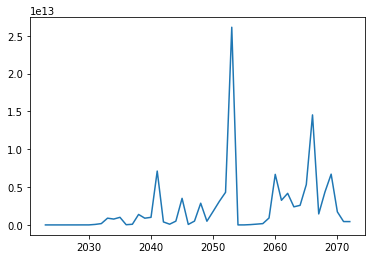

In [72]:
annee = 2023

def plotModel():
  x = nbannée(annee)
  y = model()

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotModel()


 **a) Année à laquelle l'arbre atteindra sa plus grande taille  : [texte du lien](https://)**

In [74]:
from operator import indexOf

y = model().index(max(model())) 
print (str(nbannée(annee)[y]))

2053



**b) Valeurs de cette arbre en cm**

In [75]:
print (str(max(model())) + ' cm')

26131659875251.46 cm


**c) Plus grande variation entre deux annéees :**

In [77]:
def diffrence():
  x1 = max(model())
  x2 = model()[model().index(max(model())) -1 ]

  return x1-x2

print (str(diffrence()) + ' cm')

21821613441579.723cm


**d) Année d'observation de ces marges :**  2050 à 2053

5) Similation de 50 réalisations sur 50 années

